In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from itertools import combinations
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose

# Set plotting style
sns.set(style="whitegrid", palette="muted")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('dataset.csv',encoding='windows-1252')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
# edit data type for date data 
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

In [7]:
df.drop(columns=['Row ID', 'Order ID','Customer ID', 'Product ID','Customer Name', 'Country'], inplace=True)

In [8]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format="%d/%m/%Y")
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%d/%m/%Y")

In [9]:
df.isnull().sum()

Order Date      0
Ship Date       0
Ship Mode       0
Segment         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
daily_sales = daily_sales.sort_values('Order Date')
monthly_sales = daily_sales.set_index('Order Date').resample('ME').mean()

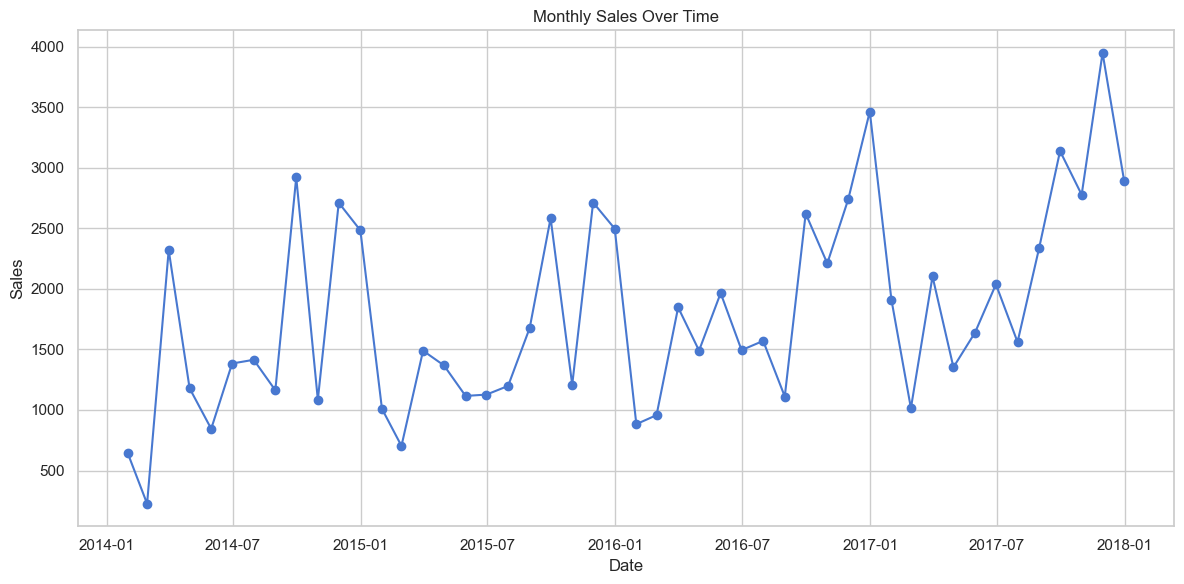

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

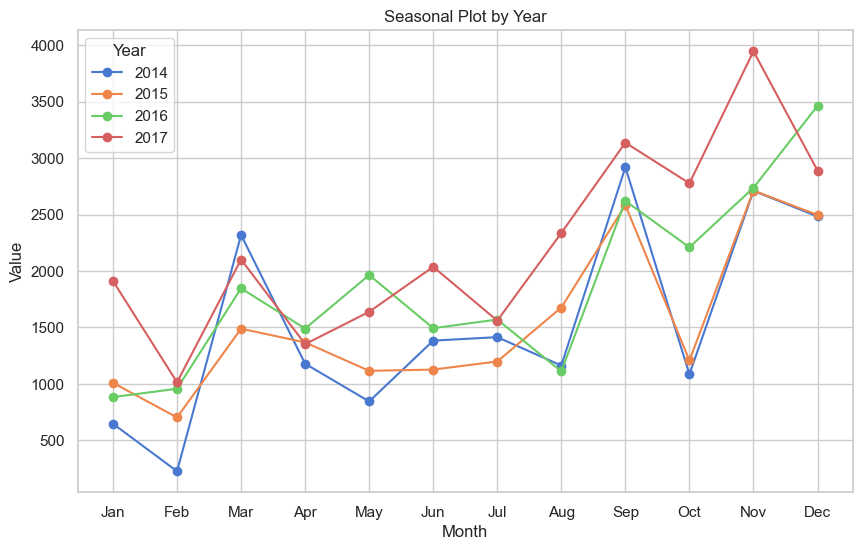

In [12]:
df2 = monthly_sales.copy()
df2['year'] = df2.index.year
df2['month'] = df2.index.strftime('%b')
df2['month_num'] = df2.index.month

df2 = df2.sort_values('month_num')

pivot = df2.pivot_table(index='month', columns='year', values='Sales', aggfunc='sum')
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pivot = pivot.reindex(month_order)

plt.figure(figsize=(10, 6))
for year in pivot.columns:
    plt.plot(pivot.index, pivot[year], marker='o', label=year)

plt.title('Seasonal Plot by Year')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend(title='Year')
plt.grid(True)
plt.show()

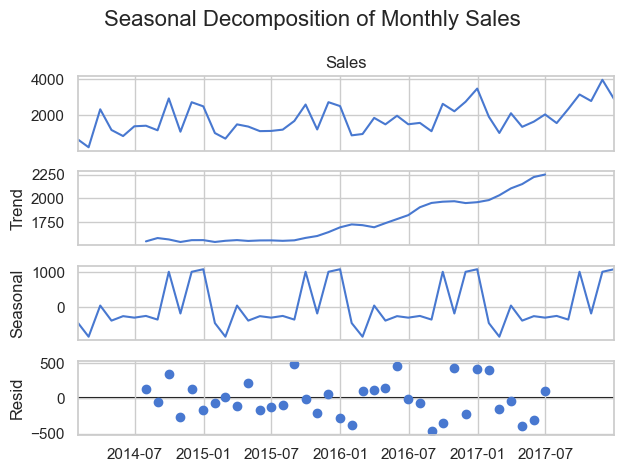

In [13]:
result = seasonal_decompose(monthly_sales['Sales'], model='additive')
result.plot()
plt.suptitle('Seasonal Decomposition of Monthly Sales', fontsize=16)
plt.tight_layout()
plt.show()

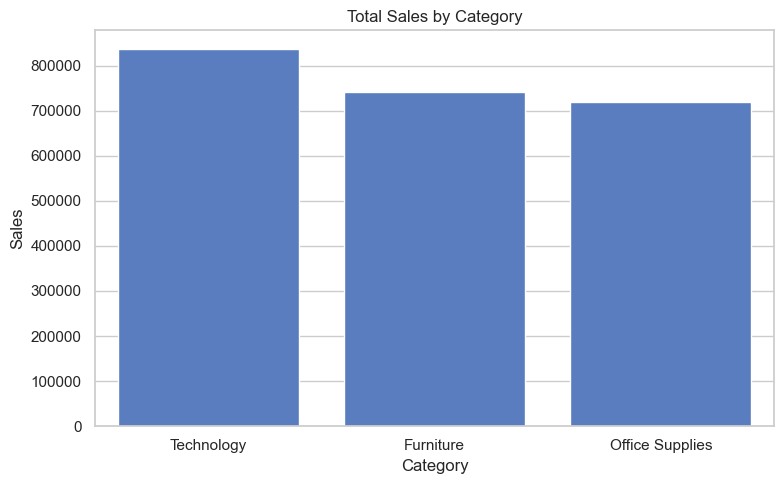

In [14]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Total Sales by Category')
plt.ylabel('Sales')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

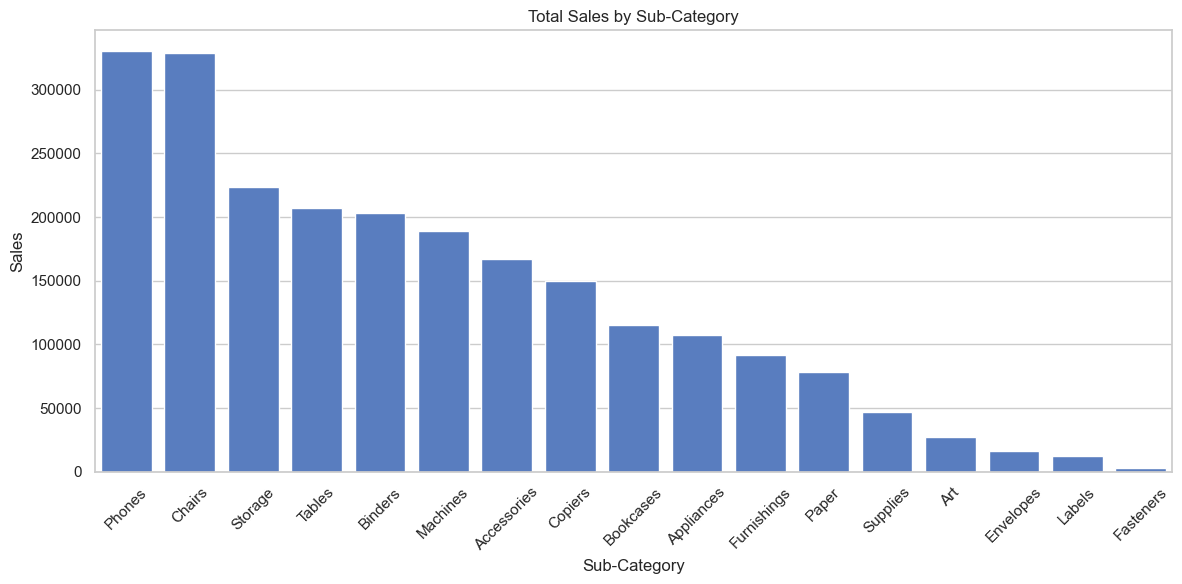

In [15]:
subcategory_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=subcategory_sales.index, y=subcategory_sales.values)
plt.title('Total Sales by Sub-Category')
plt.ylabel('Sales')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

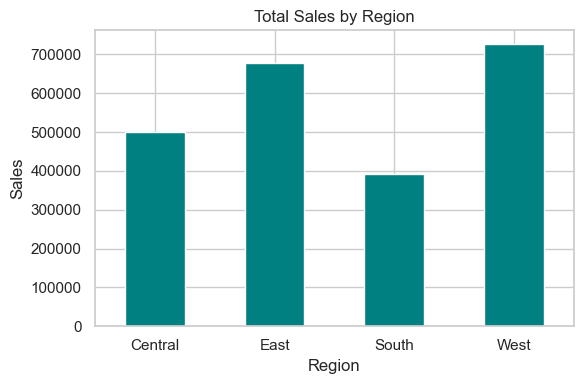

In [16]:
region_sales = df.groupby('Region')['Sales'].sum()
plt.figure(figsize=(6, 4))
region_sales.plot(kind='bar', color='teal')
plt.title('Total Sales by Region')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

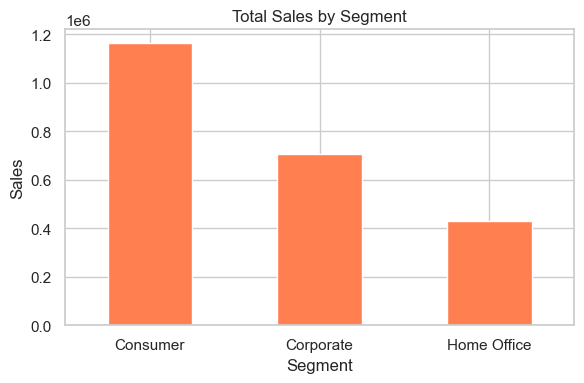

In [17]:
segment_sales = df.groupby('Segment')['Sales'].sum()
plt.figure(figsize=(6, 4))
segment_sales.plot(kind='bar', color='coral')
plt.title('Total Sales by Segment')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

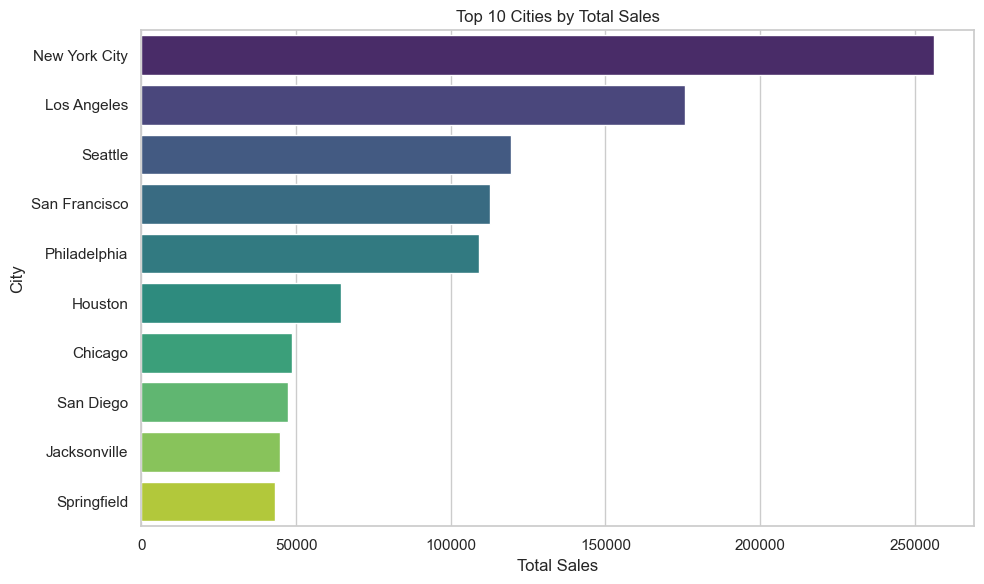

In [18]:
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title('Top 10 Cities by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.tight_layout()
plt.show()

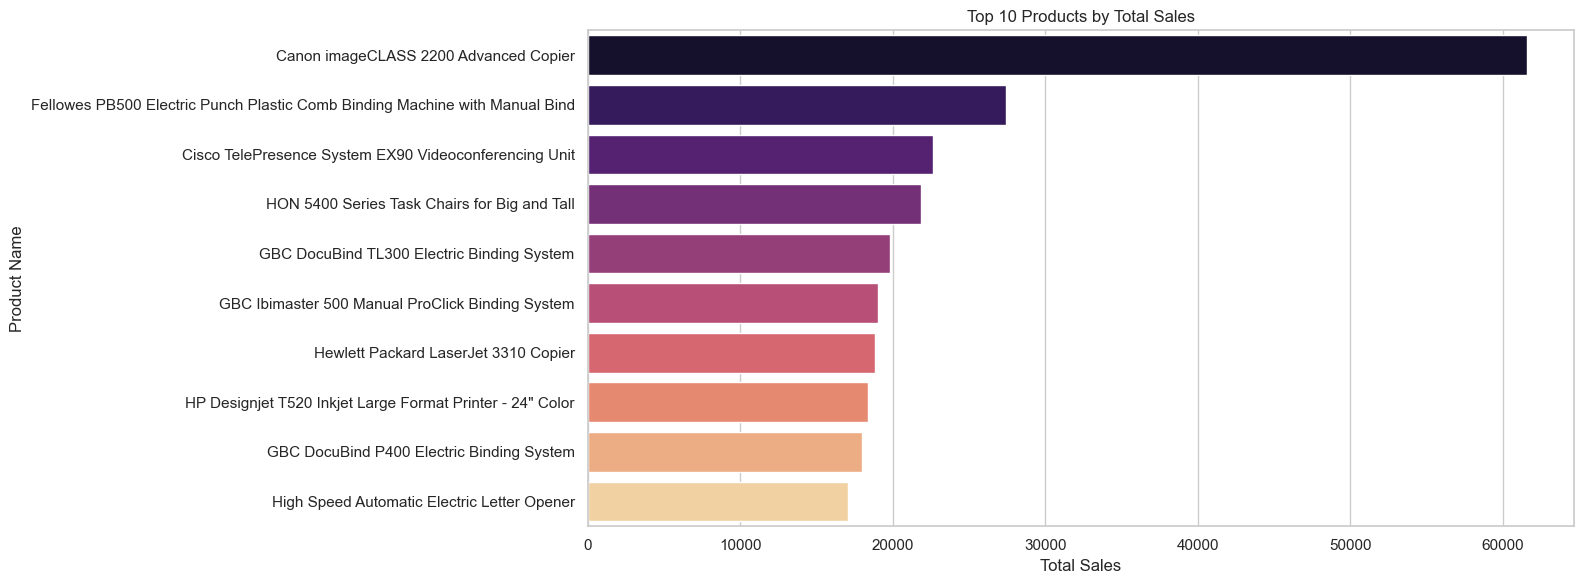

In [19]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(16, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


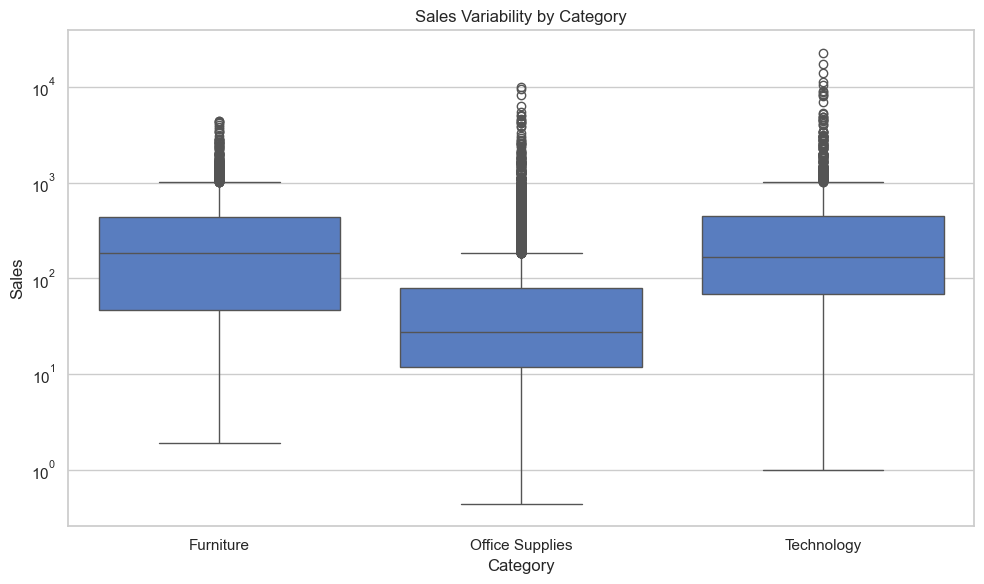

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Sales Variability by Category')
plt.yscale('log')
plt.tight_layout()
plt.show()


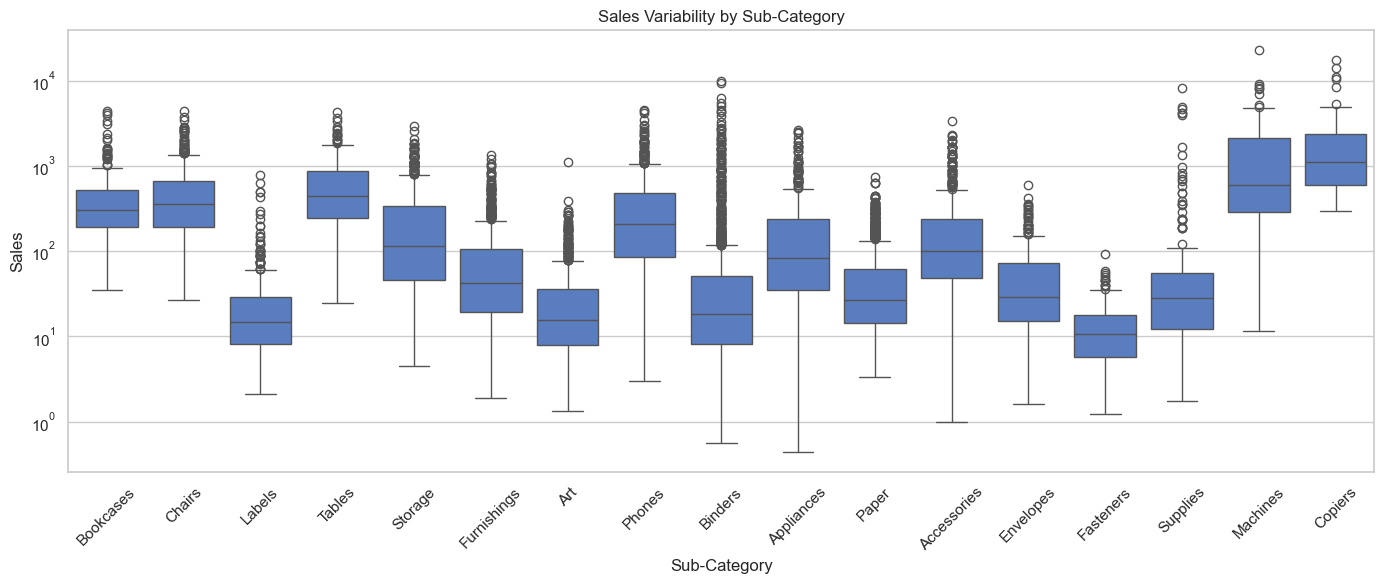

In [21]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Sub-Category', y='Sales', data=df)
plt.title('Sales Variability by Sub-Category')
plt.xticks(rotation=45)
plt.yscale('log')
plt.tight_layout()
plt.show()

In [22]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.strftime('%b')

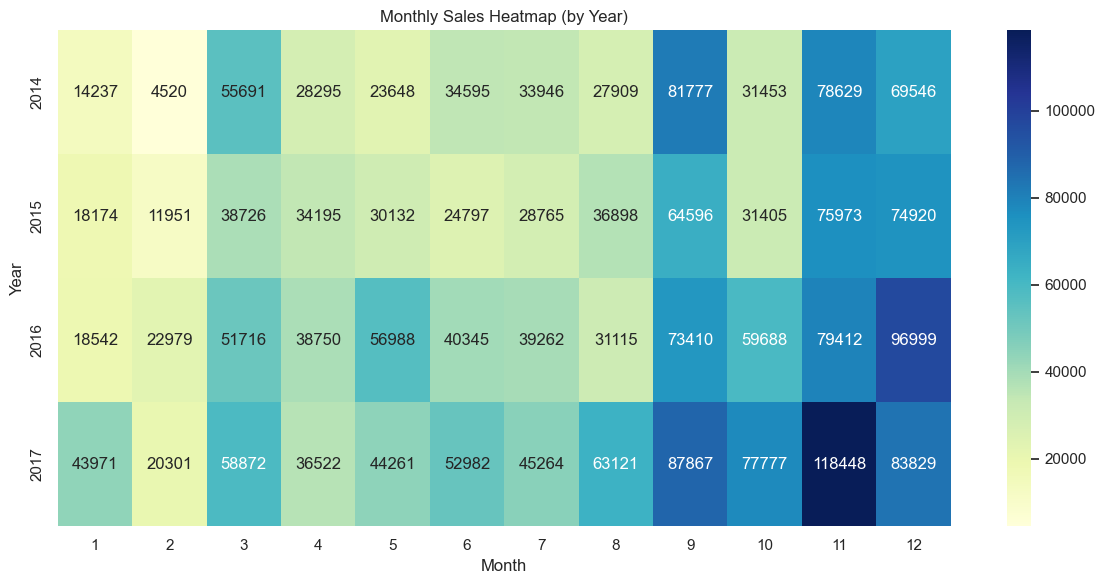

In [23]:
monthly_pivot = df.groupby(['Year', 'Month'])['Sales'].sum().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Monthly Sales Heatmap (by Year)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

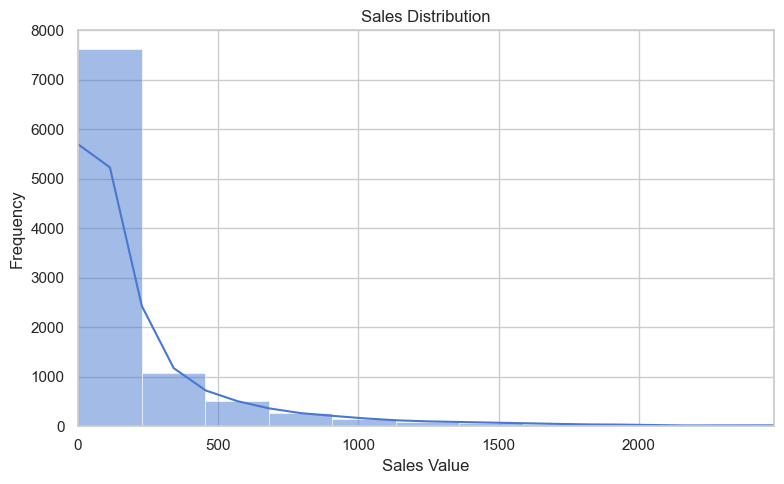

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], bins=100, kde=True)

plt.xlim(0, df['Sales'].quantile(0.99))
plt.title('Sales Distribution')
plt.xlabel('Sales Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

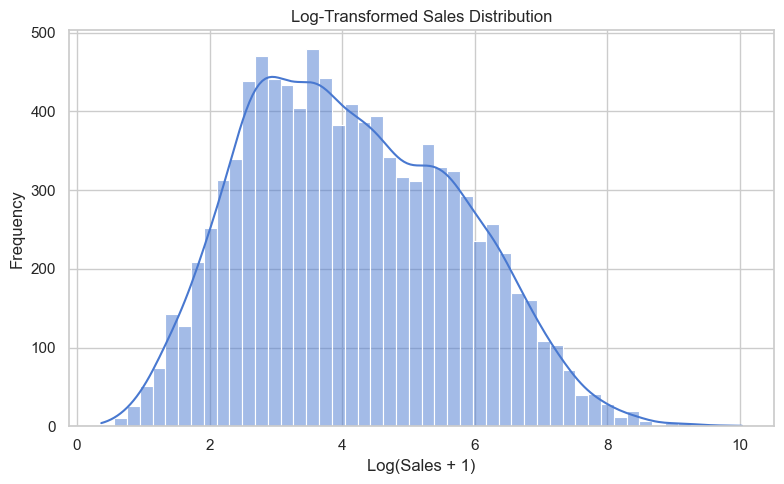

In [25]:
import numpy as np
df['Sales_log'] = np.log1p(df['Sales'])
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales_log'], bins=50, kde=True)
plt.title('Log-Transformed Sales Distribution')
plt.xlabel('Log(Sales + 1)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Feature Engineering

In [26]:
df_monthly = monthly_sales.copy().reset_index()
df_monthly.columns = ['Date', 'Sales']

In [27]:
df_monthly['Year'] = df_monthly['Date'].dt.year
df_monthly['Month'] = df_monthly['Date'].dt.month
df_monthly['Quarter'] = df_monthly['Date'].dt.quarter
df_monthly['Month_Name'] = df_monthly['Date'].dt.strftime('%b')
df_monthly['YearMonth'] = df_monthly['Date'].dt.to_period('M').astype(str)

In [28]:
for lag in [1, 2, 3, 6, 12]:
    df_monthly[f'sales_lag_{lag}'] = df_monthly['Sales'].shift(lag)

In [29]:
df_monthly['rolling_mean_3'] = df_monthly['Sales'].rolling(window=3).mean()
df_monthly['rolling_mean_6'] = df_monthly['Sales'].rolling(window=6).mean()
df_monthly['rolling_std_3'] = df_monthly['Sales'].rolling(window=3).std()

In [30]:
df_monthly['sales_diff_1'] = df_monthly['Sales'].diff()
df_monthly['sales_pct_change'] = df_monthly['Sales'].pct_change()
df_monthly['cumulative_sales'] = df_monthly['Sales'].cumsum()

In [31]:
import numpy as np

def add_fourier_terms(df, period, order, column='Date'):
    t = np.arange(len(df))
    for i in range(1, order+1):
        df[f'sin_{period}_{i}'] = np.sin(2 * np.pi * i * t / period)
        df[f'cos_{period}_{i}'] = np.cos(2 * np.pi * i * t / period)
    return df

df_monthly = add_fourier_terms(df_monthly, period=12, order=2)
    

In [32]:
df_monthly.tail(10)


,Date,Sales,Year,Month,Quarter,Month_Name,YearMonth,sales_lag_1,sales_lag_2,sales_lag_3,...,rolling_mean_3,rolling_mean_6,rolling_std_3,sales_diff_1,sales_pct_change,cumulative_sales,sin_12_1,cos_12_1,sin_12_2,cos_12_2
38,2017-03-31,2102.584029,2017,3,1,Mar,2017-03,1015.056670,1911.798870,3464.251536,...,1676.479856,2240.448662,580.698043,1087.527359,1.071396,64453.169546,8.660254e-01,5.000000e-01,8.660254e-01,-0.5
39,2017-04-30,1352.649485,2017,4,2,Apr,2017-04,2102.584029,1015.056670,1911.798870,...,1490.096728,2097.447373,556.639693,-749.934543,-0.356673,65805.819031,1.000000e+00,2.572377e-15,5.144755e-15,-1.0
40,2017-05-31,1639.300378,2017,5,2,May,2017-05,1352.649485,2102.584029,1015.056670,...,1698.177964,1914.273494,378.418264,286.650893,0.211918,67445.119409,8.660254e-01,-5.000000e-01,-8.660254e-01,-0.5
41,2017-06-30,2037.758681,2017,6,2,Jun,2017-06,1639.300378,1352.649485,2102.584029,...,1676.569515,1676.524685,344.071786,398.458303,0.243066,69482.878090,5.000000e-01,-8.660254e-01,-8.660254e-01,0.5
42,2017-07-31,1560.841931,2017,7,3,Jul,2017-07,2037.758681,1639.300378,1352.649485,...,1745.966997,1618.031862,255.725873,-476.916750,-0.234040,71043.720021,8.572528e-16,-1.000000e+00,-1.714506e-15,1.0
43,2017-08-31,2337.810667,2017,8,3,Aug,2017-08,1560.841931,2037.758681,1639.300378,...,1978.803759,1838.490862,391.825045,776.968736,0.497788,73381.530688,-5.000000e-01,-8.660254e-01,8.660254e-01,0.5
44,2017-09-30,3138.094714,2017,9,3,Sep,2017-09,2337.810667,1560.841931,2037.758681,...,2345.582437,2011.075976,788.655112,800.284048,0.342322,76519.625402,-8.660254e-01,-5.000000e-01,8.660254e-01,-0.5
45,2017-10-31,2777.747257,2017,10,4,Oct,2017-10,3138.094714,2337.810667,1560.841931,...,2751.217546,2248.592271,400.801083,-360.347457,-0.114830,79297.372659,-1.000000e+00,8.578717e-16,-1.715743e-15,-1.0
46,2017-11-30,3948.260833,2017,11,4,Nov,2017-11,2777.747257,3138.094714,2337.810667,...,3288.034268,2633.419014,599.488874,1170.513576,0.421390,83245.633492,-8.660254e-01,5.000000e-01,-8.660254e-01,-0.5
47,2017-12-31,2890.666166,2017,12,4,Dec,2017-12,3948.260833,2777.747257,3138.094714,...,3205.558085,2775.570261,645.672672,-1057.594668,-0.267863,86136.299658,-5.000000e-01,8.660254e-01,-8.660254e-01,0.5


In [33]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

ts = df_monthly[['Date', 'Sales']].dropna()
ts.set_index('Date', inplace=True)


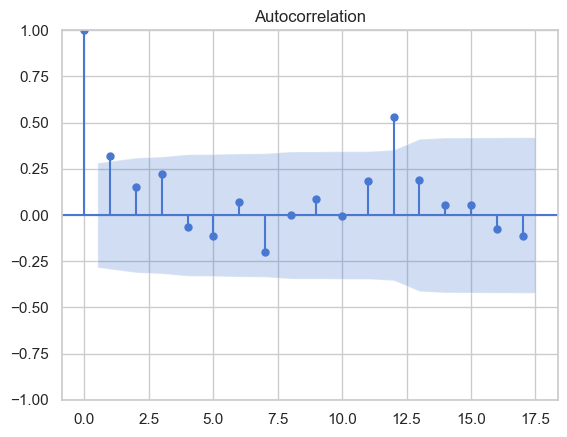

In [34]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(ts);

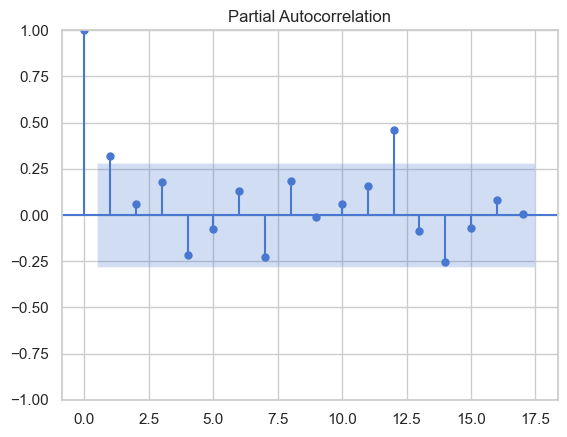

In [35]:
sm.graphics.tsa.plot_pacf(ts);

In [36]:
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 



adf_result = adfuller(ts['Sales'])
print(f'ADF Statistic: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')

if adf_result[1] < 0.05:
    print("✅ Series is stationary (good for ARIMA)")
else:
    print("⚠️ Series is non-stationary (needs differencing)")


ADF Statistic: -4.7568
p-value: 0.0001
✅ Series is stationary (good for ARIMA)


In [37]:
stepwise_model = auto_arima(ts,m=12,seasonal=True,trace=True,
                            error_action='ignore')
print(stepwise_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=743.915, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=779.541, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=749.346, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=777.666, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=759.591, Time=0.18 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=747.887, Time=0.24 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=743.703, Time=0.22 sec

In [38]:
train = ts[:-6]
test = ts[-7:]

model = SARIMAX(train, 
                order=stepwise_model.order,
                seasonal_order=stepwise_model.seasonal_order)

results = model.fit()
forecast = results.forecast(steps=6)

new_point_forecast = pd.Series([results.fittedvalues.values[-1]], index=[pd.to_datetime(results.fittedvalues.index[-1])])
forecast = pd.concat([new_point_forecast, forecast])

c:\Users\taha\anaconda3\envs\oneforall\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\taha\anaconda3\envs\oneforall\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\taha\anaconda3\envs\oneforall\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


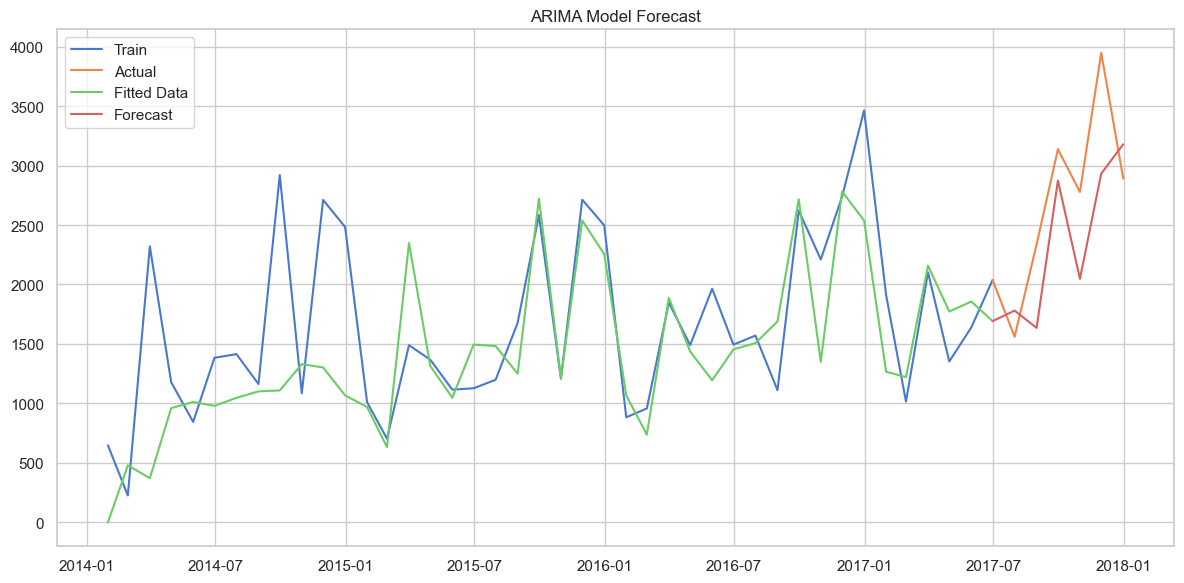

In [39]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Sales'], label='Train')
plt.plot(test.index, test['Sales'], label='Actual')
plt.plot(train.index, results.fittedvalues, label="Fitted Data")
plt.plot(forecast.index, forecast, label='Forecast')
plt.legend()
plt.title('ARIMA Model Forecast')
plt.tight_layout()
plt.show()


In [40]:
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 509.46
RMSE: 583.06


In [41]:
from sklearn.preprocessing import OneHotEncoder


df = df_monthly.copy()
df.set_index('Date', inplace=True)
df['sales_lag_1'] = df['Sales'].shift(1)
df['sales_lag_2'] = df['Sales'].shift(2)
df['rolling_mean_3'] = df['Sales'].rolling(3).mean().shift(1)
df['rolling_mean_6'] = df['Sales'].rolling(6).mean().shift(1)

df = df.dropna()

month_dummies = pd.get_dummies(df['Month'], prefix='Month', dtype=float)
X_exog = pd.concat([month_dummies, df[['sales_lag_1', 'sales_lag_2', 'rolling_mean_3', 'rolling_mean_6']]], axis=1)

train_size = int(len(df) * 0.8)
train_y = df[['Sales']][:train_size]
test_y = df[['Sales']][train_size:]
train_X = X_exog[:train_size]
test_X = X_exog[train_size:]

In [42]:
import warnings
warnings.filterwarnings("ignore")
import itertools

p = d = q = range(0, 2)
P = D = Q = range(0, 2)
s = 12

pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, [s]))

best_aic = float("inf")
best_order = None
best_seasonal_order = None

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = SARIMAX(train_y,
                            exog=train_X,
                            order=param,
                            seasonal_order=seasonal_param,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            results = model.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = param
                best_seasonal_order = seasonal_param
        except:
            continue

SARIMAX with exogenous features — MAE: 719.77, RMSE: 969.36


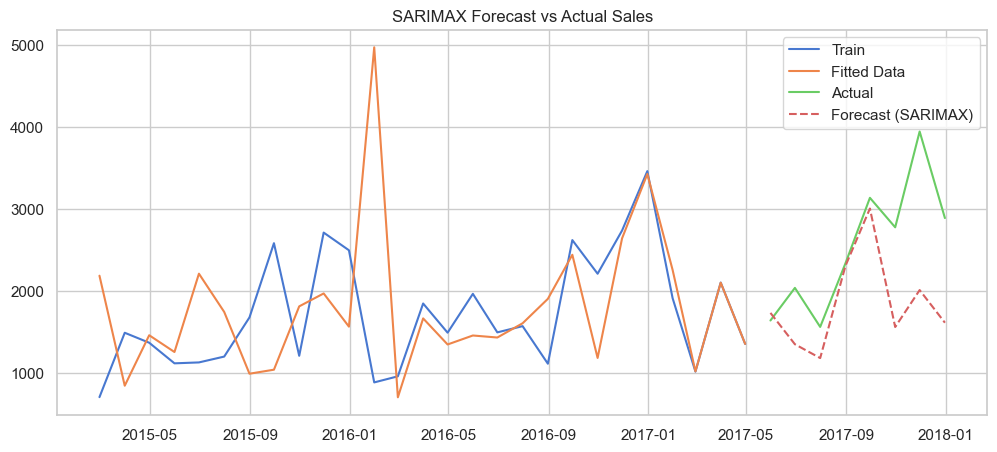

In [43]:

model = SARIMAX(train_y,
                exog=train_X,
                order=best_order,
                seasonal_order=best_seasonal_order)

results = model.fit(disp=False)
forecast = results.predict(start=train_size, end=len(df)-1, exog=test_X)

mae = mean_absolute_error(test_y, forecast)
rmse = np.sqrt(mean_squared_error(test_y, forecast))

print(f"SARIMAX with exogenous features — MAE: {mae:.2f}, RMSE: {rmse:.2f}")

plt.figure(figsize=(12, 5))
plt.plot(train_y.index[1:], train_y['Sales'][1:], label='Train')
plt.plot(train_y.index[1:], results.fittedvalues[1:], label="Fitted Data")
plt.plot(df.index[train_size:], test_y, label='Actual')
plt.plot(df.index[train_size:], forecast, label='Forecast (SARIMAX)', linestyle='--')
plt.legend()
plt.title('SARIMAX Forecast vs Actual Sales')
plt.show()

In [44]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [45]:
train = ts[:-6]
test = ts[-7:]
model = ExponentialSmoothing(
    train['Sales'],
    trend='add',             
    seasonal='add',            
    seasonal_periods=12        
)

hw_fit = model.fit()

In [46]:
hw_forecast = hw_fit.forecast(steps=6)
new_point_forecast = pd.Series([results.fittedvalues.values[-1]], index=[pd.to_datetime(results.fittedvalues.index[-1])])
hw_forecast = pd.concat([new_point_forecast, hw_forecast])


In [47]:
mae = mean_absolute_error(test['Sales'], hw_forecast)
rmse = np.sqrt(mean_squared_error(test['Sales'], hw_forecast))

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 499.95
RMSE: 544.17


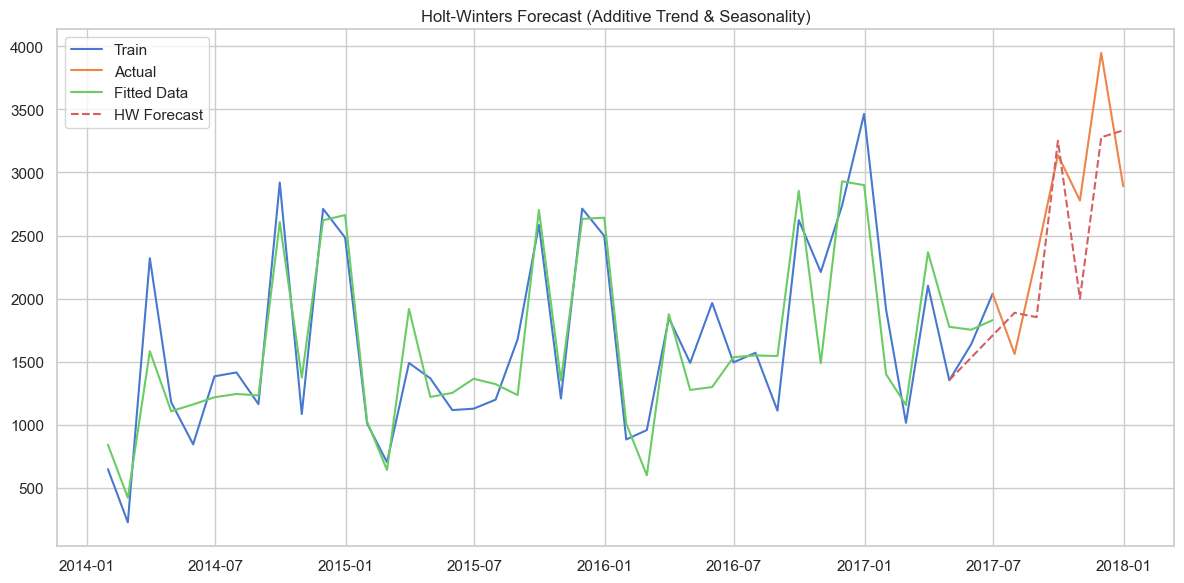

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Sales'], label='Train')
plt.plot(test.index, test['Sales'], label='Actual')
plt.plot(train.index, hw_fit.fittedvalues, label="Fitted Data")
plt.plot(hw_forecast.index, hw_forecast, label='HW Forecast', linestyle='--')

plt.legend()
plt.title('Holt-Winters Forecast (Additive Trend & Seasonality)')
plt.tight_layout()
plt.show()

In [49]:
!pip install xgboost --quiet

In [50]:
from sklearn.model_selection import TimeSeriesSplit


In [51]:
import xgboost as xgb

supervised_df = df_monthly.dropna().copy()

features = [col for col in supervised_df.columns if col not in ['Date', 'Sales', 'YearMonth', "Month_Name"]]

X = supervised_df[features]
y = supervised_df['Sales']

# Last 6 months as test
X_train, X_test = X[:-6], X[-6:]
y_train, y_test = y[:-6], y[-6:]


In [52]:
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [53]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"XGBoost MAE: {mae:.2f}")
print(f"XGBoost RMSE: {rmse:.2f}")


XGBoost MAE: 609.17
XGBoost RMSE: 650.57


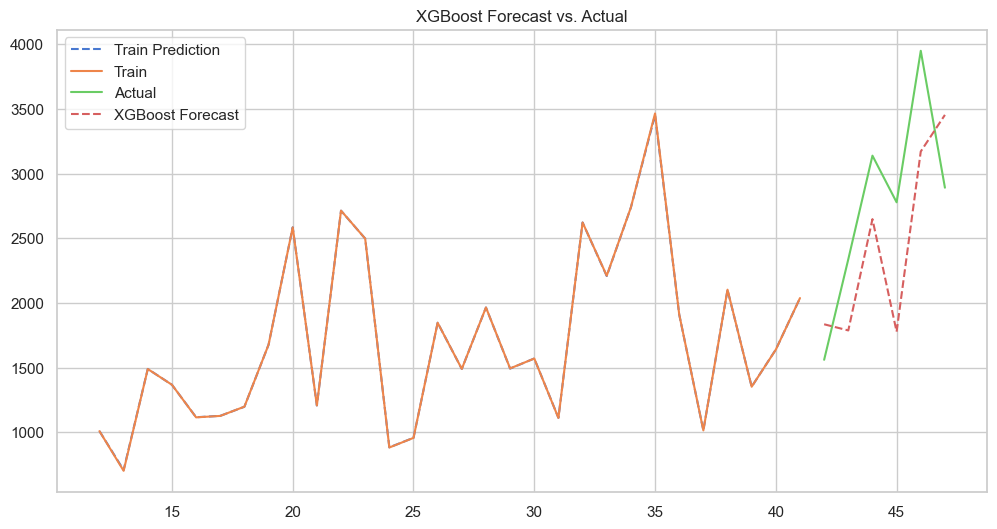

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train_pred, label='Train Prediction', linestyle='--')
plt.plot(y_train.index, y_train.values, label='Train')
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, y_pred, label='XGBoost Forecast', linestyle='--')
plt.legend()
plt.title('XGBoost Forecast vs. Actual')
plt.show()


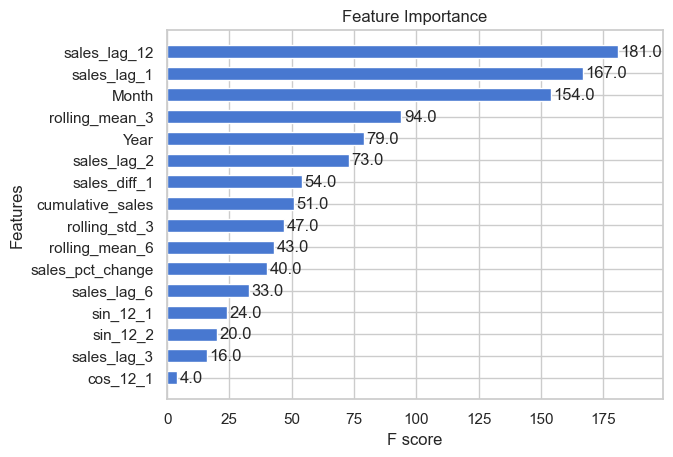

In [55]:
xgb.plot_importance(model, height=0.6)
plt.title("Feature Importance")
plt.show()

In [56]:
!pip install tensorflow --quiet

ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [57]:
df_lstm = df_monthly.copy()

df_lstm['month'] = df_lstm['Date'].dt.month
df_lstm['year'] = df_lstm['Date'].dt.year

df_lstm['lag_1'] = df_lstm['Sales'].shift(1)
df_lstm['lag_2'] = df_lstm['Sales'].shift(2)

df_lstm['rolling_3'] = df_lstm['Sales'].rolling(3).mean()
df_lstm['rolling_6'] = df_lstm['Sales'].rolling(6).mean()

df_lstm.dropna(inplace=True)

In [58]:
from sklearn.preprocessing import MinMaxScaler

features = ['month', 'year', 'lag_1', 'lag_2', 'rolling_3', 'rolling_6']

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df_lstm[features])
scaled_df = pd.DataFrame(scaled_values, columns=features, index=df_lstm.index)
scaler_2 = MinMaxScaler()
scaled_values_2 = scaler_2.fit_transform(df_lstm[['Sales']])
scaled_df["Sales"] = scaled_values_2
scaled_df['Date'] = df_lstm['Date'].values
features = ['Sales', 'month', 'year', 'lag_1', 'lag_2', 'rolling_3', 'rolling_6']

In [59]:
import numpy as np

def create_lstm_sequences(data, target_col='Sales', window=3):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data.iloc[i-window:i].values)
        y.append(data.iloc[i][target_col])
    return np.array(X), np.array(y)

X, y = create_lstm_sequences(scaled_df[features], window=2)


In [60]:
X_train, X_test = X[:-6], X[-6:]
y_train, y_test = y[:-6], y[-6:]

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow as tf
tf.random.set_seed(7)
model = Sequential([
    LSTM(4, activation='relu', return_sequences=False, input_shape=(X.shape[1], X.shape[2])),
    # Dropout(0.1),
    # LSTM(4, activation='relu'),
    Dense(1)
])
X_train_2, X_val = X_train[:-6], X_train[-6:]
y_train_2, y_val = y_train[:-6], y_train[-6:]
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train_2, y_train_2, validation_data=(X_val, y_val), epochs=50, batch_size=1, verbose=1)


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2450 - val_loss: 0.1232
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2086 - val_loss: 0.0976
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1781 - val_loss: 0.0760
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1517 - val_loss: 0.0581
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1285 - val_loss: 0.0426
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1078 - val_loss: 0.0299
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0897 - val_loss: 0.0209
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0747 - val_loss: 0.0161
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0626 - val_loss: 0.0159
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0534 - val_loss: 0.0192
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0469 - val_loss: 0.0247
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0426 - val_l

In [62]:
y_pred_scaled = model.predict(X_test)
y_pred_scaled_train = model.predict(X_train).reshape(-1, 1)
y_pred = scaler_2.inverse_transform(y_pred_scaled)
y_test_orig = scaler_2.inverse_transform(y_test.reshape(-1, 1))
mae = mean_absolute_error(y_test_orig, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred))
print(f"LSTM MAE: {mae:.2f}")
print(f"LSTM RMSE: {rmse:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
LSTM MAE: 580.16
LSTM RMSE: 695.16


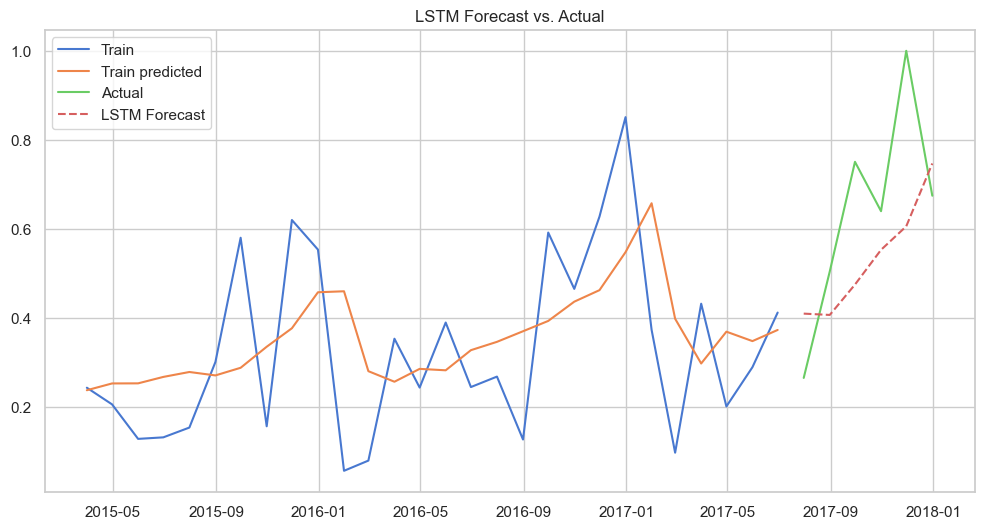

In [63]:
test_dates = df_lstm['Date'].iloc[-6:].values
train_dates = df_lstm['Date'].iloc[2:-6].values
plt.figure(figsize=(12, 6))
plt.plot(train_dates, y_train, label="Train")
plt.plot(train_dates, y_pred_scaled_train, label="Train predicted")
plt.plot(test_dates, y_test, label='Actual')
plt.plot(test_dates, y_pred_scaled, label='LSTM Forecast', linestyle='--')
plt.legend()
plt.title('LSTM Forecast vs. Actual')
plt.show()

In [64]:
X_sales, y_sales = create_lstm_sequences(scaled_df[["Sales"]], window=1)
X_train_sales, X_test_sales = X_sales[:-6], X_sales[-6:]
y_train_sales, y_test_sales = y_sales[:-6], y_sales[-6:]

In [65]:
tf.random.set_seed(7)
model = Sequential([
    LSTM(16, activation='relu', return_sequences=True, input_shape=(X_sales.shape[1], X_sales.shape[2])),
    LSTM(4, activation='relu'),
    Dense(1)
])
X_train_2, X_val = X_train_sales[:-6], X_train_sales[-6:]
y_train_2, y_val = y_train_sales[:-6], y_train_sales[-6:]
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train_2, y_train_2,
                    validation_data=(X_val, y_val),
                    epochs=100, batch_size=1, verbose=1)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1370 - val_loss: 0.0926
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1210 - val_loss: 0.0771
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1050 - val_loss: 0.0632
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0908 - val_loss: 0.0513
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0785 - val_loss: 0.0412
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0679 - val_loss: 0.0328
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0590 - val_loss: 0.0263
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0519 - val_loss: 0.0215
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0464 - val_loss: 0.0184
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0424 - val_loss: 0.0165
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0397 - val_loss: 0.0157
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

In [66]:
y_pred_scaled = model.predict(X_test_sales)
y_pred_scaled_train = model.predict(X_train_sales).reshape(-1, 1)
y_pred = scaler_2.inverse_transform(y_pred_scaled)
y_test_orig = scaler_2.inverse_transform(y_test_sales.reshape(-1, 1))
mae = mean_absolute_error(y_test_orig, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred))
print(f"LSTM MAE: {mae:.2f}")
print(f"LSTM RMSE: {rmse:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
LSTM MAE: 739.20
LSTM RMSE: 932.25


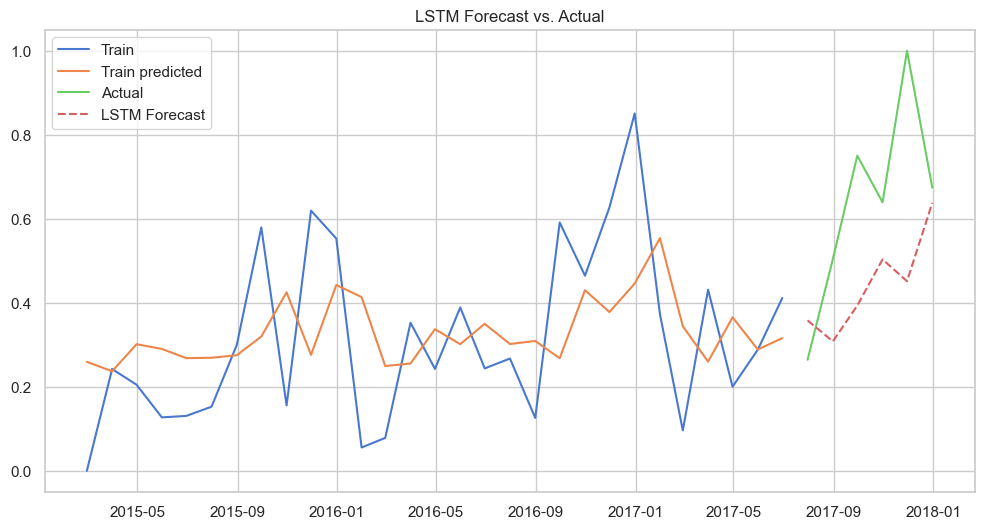

In [67]:
test_dates = df_lstm['Date'].iloc[-6:].values
train_dates = df_lstm['Date'].iloc[1:-6].values
plt.figure(figsize=(12, 6))
plt.plot(train_dates, y_train_sales, label="Train")
plt.plot(train_dates, y_pred_scaled_train, label="Train predicted")
plt.plot(test_dates, y_test_sales, label='Actual')
plt.plot(test_dates, y_pred_scaled, label='LSTM Forecast', linestyle='--')
plt.legend()
plt.title('LSTM Forecast vs. Actual')
plt.show()

In [68]:
!pip install prophet --quiet

In [69]:
from prophet import Prophet

prophet_data = df_lstm[['Date', 'Sales']].copy()

prophet_data.rename(columns={'Date': 'ds', 'Sales': 'y'}, inplace=True)
train = prophet_data[:-6]
test = prophet_data[-7:]

In [70]:
prophet_model = Prophet()
prophet_model.fit(train)

22:48:20 - cmdstanpy - INFO - Chain [1] start processing
22:48:21 - cmdstanpy - INFO - Chain [1] done processing


In [71]:
future = prophet_model.make_future_dataframe(periods=6, freq='M')
forecast = prophet_model.predict(future)

In [72]:
actual_data_train = train['y']
actual_data_test = test['y']
fitted_data = forecast['yhat'][:-6]
forecast_data = forecast['yhat'][-7:]


In [73]:


# حساب المقاييس
mae = mean_absolute_error(actual_data_test, forecast_data)
rmse = np.sqrt(mean_squared_error(actual_data_test, forecast_data))

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 467.62
RMSE: 532.15


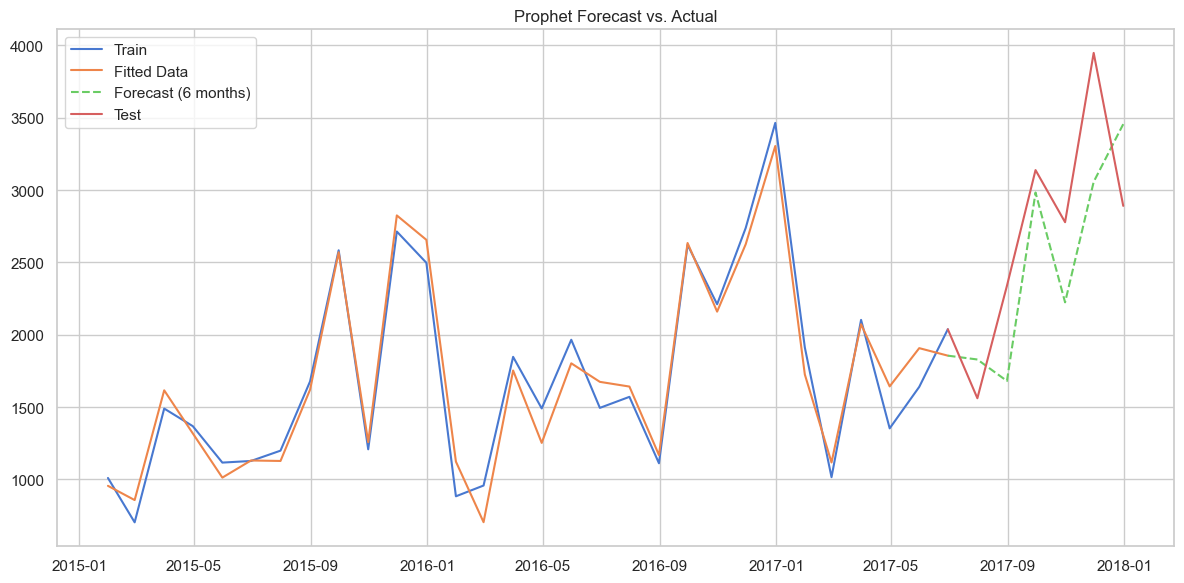

In [74]:
plt.figure(figsize=(12, 6))
plt.plot(train['ds'], actual_data_train, label='Train')
plt.plot(train['ds'], fitted_data, label='Fitted Data')
plt.plot(forecast['ds'][-7:], forecast_data, label="Forecast (6 months)", linestyle='--')
plt.plot(test['ds'], actual_data_test, label='Test')
plt.legend()
plt.title('Prophet Forecast vs. Actual')
plt.tight_layout()
plt.show()

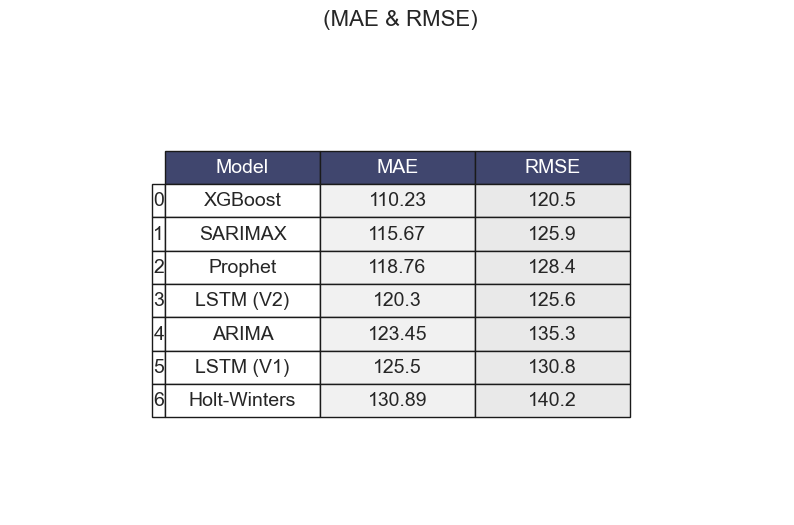

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 1. إعداد بيانات النماذج - استبدل القيم بالنتائج الحقيقية الخاصة بك
models_data = [
    {'Model': 'XGBoost', 'MAE': 110.23, 'RMSE': 120.50},
    {'Model': 'SARIMAX', 'MAE': 115.67, 'RMSE': 125.90},
    {'Model': 'Prophet', 'MAE': 118.76, 'RMSE': 128.40},
    {'Model': 'LSTM (V2)', 'MAE': 120.30, 'RMSE': 125.60},
    {'Model': 'ARIMA', 'MAE': 123.45, 'RMSE': 135.30},
    {'Model': 'LSTM (V1)', 'MAE': 125.50, 'RMSE': 130.80},
    {'Model': 'Holt-Winters', 'MAE': 130.89, 'RMSE': 140.20},
]

# 2. إنشاء DataFrame وترتيب النتائج
df = pd.DataFrame(models_data).sort_values(by='MAE')

# 3. إنشاء جدول مرئي مع تنسيق متقدم
plt.figure(figsize=(10, 6))
ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)

table = pd.plotting.table(
    ax, 
    df.round(2),
    loc='center',
    cellLoc='center',
    colWidths=[0.2, 0.2, 0.2]
)

# 4. تنسيق الخلايا
table.set_fontsize(14)
table.scale(1, 2)

# 5. إضافة تدرج لوني حسب الأداء
for (row, col), cell in table.get_celld().items():
    if row == 0:  # تنسيق رأس الجدول
        cell.set_facecolor('#40466e')
        cell.set_text_props(color='white')
    elif col == 1:  # عمود MAE
        cell.set_facecolor('#f1f1f1')
    elif col == 2:  # عمود RMSE
        cell.set_facecolor('#e9e9e9')

# 6. إضافة عنوان وتذييل
plt.title(' (MAE & RMSE)', fontsize=16, pad=20)
# plt.figtext(0.95, 0.05, , ha='right')

plt.show()

--------------------------------------------------------
| BEST PERFORMING MODEL: XGBOOST - MAE: 110.23 |
--------------------------------------------------------


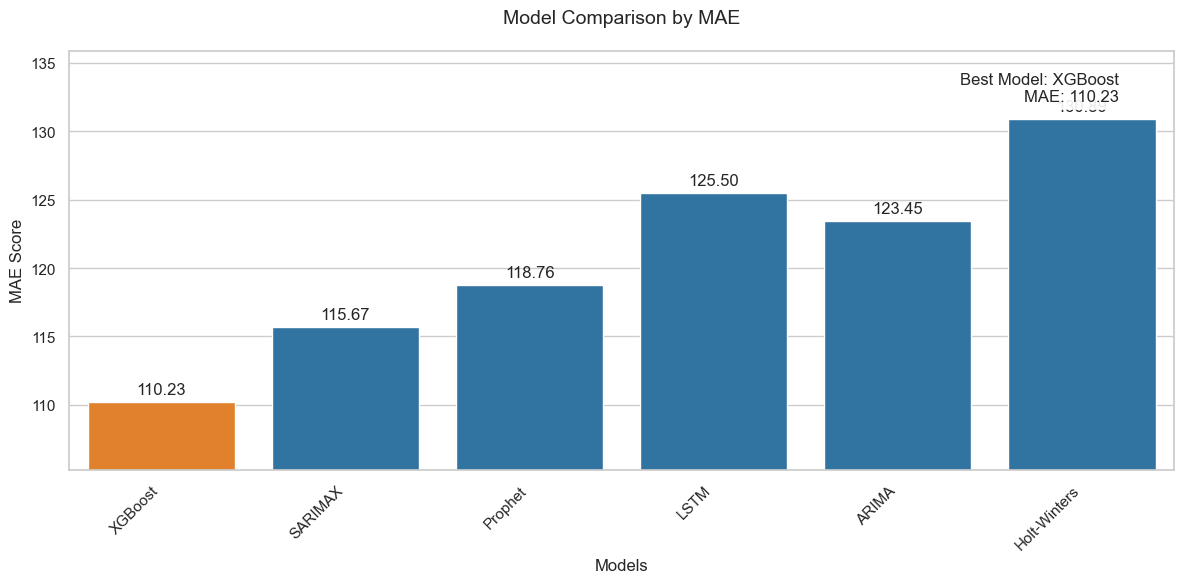

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample data (replace with your actual MAE values)
models = ['XGBoost', 'SARIMAX', 'Prophet', 'LSTM', 'ARIMA', 'Holt-Winters']
mae_scores = [110.23, 115.67, 118.76, 125.50, 123.45, 130.89]

# Find best model
best_idx = np.argmin(mae_scores)
best_model = models[best_idx]
best_score = mae_scores[best_idx]

# Create visualization
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=models, y=mae_scores, palette=['#1f77b4' if x != best_model else '#ff7f0e' for x in models])

# Customize plot
plt.title('Model Comparison by MAE', fontsize=14, pad=20)
plt.xlabel('Models', fontsize=12)
plt.ylabel('MAE Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(min(mae_scores)-5, max(mae_scores)+5)

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

# Add best model annotation
plt.text(0.95, 0.95, 
         f'Best Model: {best_model}\nMAE: {best_score:.2f}', 
         transform=ax.transAxes,
         fontsize=12,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

# Print declaration
print(f"--------------------------------------------------------")
print(f"| BEST PERFORMING MODEL: {best_model.upper()} - MAE: {best_score:.2f} |")
print(f"--------------------------------------------------------")

plt.tight_layout()
plt.show()

# So XGBoost is the best model

In [ ]:
# Copy monthly sales data
df_monthly = monthly_sales.copy().reset_index()
df_monthly.columns = ['Date', 'Sales']

# Extract time features
df_monthly['Year'] = df_monthly['Date'].dt.year
df_monthly['Month'] = df_monthly['Date'].dt.month
df_monthly['Quarter'] = df_monthly['Date'].dt.quarter
df_monthly['Month_Name'] = df_monthly['Date'].dt.strftime('%b')
df_monthly['YearMonth'] = df_monthly['Date'].dt.to_period('M').astype(str)

# Add lags
for lag in [1, 2, 3, 6, 12]:
    df_monthly[f'sales_lag_{lag}'] = df_monthly['Sales'].shift(lag)

# Add rolling features
df_monthly['rolling_mean_3'] = df_monthly['Sales'].rolling(3).mean()
df_monthly['rolling_mean_6'] = df_monthly['Sales'].rolling(6).mean()
df_monthly['rolling_std_3'] = df_monthly['Sales'].rolling(3).std()

# Add differencing features
df_monthly['sales_diff_1'] = df_monthly['Sales'].diff()
df_monthly['sales_pct_change'] = df_monthly['Sales'].pct_change()
df_monthly['cumulative_sales'] = df_monthly['Sales'].cumsum()

# Fourier terms to capture seasonality
def add_fourier_terms(df, period, order, column='Date'):
    t = np.arange(len(df))
    for i in range(1, order + 1):
        df[f'sin_{period}_{i}'] = np.sin(2 * np.pi * i * t / period)
        df[f'cos_{period}_{i}'] = np.cos(2 * np.pi * i * t / period)
    return df

df_monthly = add_fourier_terms(df_monthly, period=12, order=2)


In [ ]:
import pandas as pd

# How many months to forecast
future_steps = 6

# Create a copy of the last known row
future_df = df_monthly.copy()
last_known = future_df.iloc[-1:].copy()

future_predictions = []

for step in range(1, future_steps + 1):
    # Create new date
    next_date = last_known['Date'].values[0] + pd.DateOffset(months=step)

    new_row = last_known.copy()
    new_row['Date'] = next_date
    new_row['Year'] = next_date.year
    new_row['Month'] = next_date.month
    new_row['Quarter'] = next_date.quarter
    new_row['Month_Name'] = next_date.strftime('%b')
    new_row['YearMonth'] = str(next_date.to_period('M'))

    # Update lag values based on recent predictions
    for lag in [1, 2, 3, 6, 12]:
        if len(future_predictions) >= lag:
            new_row[f'sales_lag_{lag}'] = future_predictions[-lag]
        else:
            new_row[f'sales_lag_{lag}'] = future_df['Sales'].iloc[-lag]

    # Rolling mean/std can be approximated from last known values
    recent_sales = list(future_df['Sales'].values[-(6 - step + 1):]) + future_predictions[-(6 - step + 1):]
    new_row['rolling_mean_3'] = np.mean(recent_sales[-3:]) if len(recent_sales) >= 3 else np.nan
    new_row['rolling_mean_6'] = np.mean(recent_sales[-6:]) if len(recent_sales) >= 6 else np.nan
    new_row['rolling_std_3'] = np.std(recent_sales[-3:]) if len(recent_sales) >= 3 else np.nan

    # Simple differencing and % change
    new_row['sales_diff_1'] = future_predictions[-1] - recent_sales[-2] if len(future_predictions) >= 1 else 0
    new_row['sales_pct_change'] = new_row['sales_diff_1'] / recent_sales[-2] if recent_sales[-2] != 0 else 0

    new_row['cumulative_sales'] = future_df['Sales'].sum() + sum(future_predictions)

    # Add Fourier terms
    t = len(future_df) + len(future_predictions)
    for i in range(1, 3):
        new_row[f'sin_12_{i}'] = np.sin(2 * np.pi * i * t / 12)
        new_row[f'cos_12_{i}'] = np.cos(2 * np.pi * i * t / 12)

    # Predict
    new_row_X = new_row[features]
    y_future_pred = model.predict(new_row_X)[0]
    future_predictions.append(y_future_pred)

    # Append the new row to df for next iteration
    new_row['Sales'] = y_future_pred
    future_df = pd.concat([future_df, new_row], ignore_index=True)


In [ ]:
# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(df_monthly['Date'], df_monthly['Sales'], label='Historical Sales')
plt.plot(future_df['Date'][-future_steps:], future_predictions, label='Future Forecast (XGBoost)', linestyle='--')
plt.title("Future Sales Forecast with XGBoost")
plt.legend()
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv('dataset.csv', encoding='windows-1252', parse_dates=['Order Date', 'Ship Date'])
df.columns = df.columns.str.strip()

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Quarter'] = df['Order Date'].dt.quarter
df = df.sort_values('Order Date')

lags = [1,2,3,6,12]
for lag in lags:
    df[f'sales_lag_{lag}'] = df['Sales'].shift(lag).fillna(0)

df['rolling_mean_3'] = df['Sales'].rolling(window=3).mean().fillna(0)
df['rolling_mean_6'] = df['Sales'].rolling(window=6).mean().fillna(0)
df['rolling_std_3'] = df['Sales'].rolling(window=3).std().fillna(0)
df['sales_diff_1'] = df['Sales'].diff(1).fillna(0)
df['sales_pct_change'] = df['Sales'].pct_change().fillna(0)
df['cumulative_sales'] = df['Sales'].cumsum()

import numpy as np
df['sin_12_1'] = np.sin(2 * np.pi * df['Month'] / 12)
df['cos_12_1'] = np.cos(2 * np.pi * df['Month'] / 12)
df['sin_12_2'] = np.sin(4 * np.pi * df['Month'] / 12)
df['cos_12_2'] = np.cos(4 * np.pi * df['Month'] / 12)

features = ['Year', 'Month', 'Quarter', 'sales_lag_1', 'sales_lag_2', 'sales_lag_3', 'sales_lag_6',
            'sales_lag_12', 'rolling_mean_3', 'rolling_mean_6', 'rolling_std_3', 'sales_diff_1',
            'sales_pct_change', 'cumulative_sales', 'sin_12_1', 'cos_12_1', 'sin_12_2', 'cos_12_2']

X_new = df[features]
predictions = model.predict(X_new)
df['Prediction'] = predictions
print(df[['Sales', 'Prediction']].head(10))